<a class="anchor" id="0.1"></a>
## Table of Content
1. [Python](#1)

2.	[Data Analysis](#2)
   - 2.1 [Import Libraries](#2.1)
   - 2.2 [Read Dataset](#2.2)
   - 2.3 [Handle Null Values](#2.3)
   - 2.4 [Visualize the Correlation of whole dataset](#2.4)
        - 2.4.1 [Correlations](#2.4.1)
        - 2.4.2 [HeatMaps](#2.4.2)
   - 2.5 [Outiers](#2.5)
3.	[Data Preprocessing](#3)
   - 3.1 [Feature Scaling](#3.1)
4.	[Model Buikding](#4)

   - 4.1 [Kmean Clustering on Whole Dataset](#4.1)
       - 4.1.1 [Techniques for finding the Optimal Value of k](#4.1.1)
       - 4.1.2 [Elbow Method](#4.1.2)
       - 4.1.3 [Kmean Algorithm on Dataset](#4.1.3)
      
      
   - 4.2 [Kmean Clustering on two Columns](#4.2)
       - 4.2.1 [Techniques for finding the Optimal Value of k](#4.2.1)
       - 4.2.2 [Elbow Method](#4.2.2)
       - 4.2.3 [Kmean Algorithm on Dataset](#4.2.3)
       - 4.2.4 [Cluster Visualization](#4.2.4)
 
    
     
      
      
       
   

# **Python** <a class="anchor" id="1"></a>

## **Data Analysis** <a class="anchor" id="2"></a>

### **Import Libraries** <a class="anchor" id="2.1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### **Read Dataset** <a class="anchor" id="2.2"></a>

In [2]:
data = pd.read_csv('dataset_FreshCo.csv')

In [3]:
data

,homeshop,storeshop,employ,income,location,size,age
0,20,310,9,NaN,2,1,72
1,92,230,9,30550.0,2,2,60
2,69,240,10,64971.0,2,4,19
3,88,192,9,37298.0,4,2,63
4,49,42,1,41135.0,4,6,47
...,...,...,...,...,...,...,...
2088,117,98,1,30717.0,2,1,24
2089,60,162,7,17801.0,2,4,38
2090,60,62,10,29548.0,2,4,16
2091,88,248,1,18507.0,2,1,55


 ### **Handle Null Values** <a class="anchor" id="2.3"></a>

#### Check the Percentage of Null values in the Dataset

In [4]:
for feature in data:
    if data[feature].isnull().sum()>1:
        print(feature,":", np.round(data[feature].isnull().mean(),4),'%')

income : 0.3254 %


### 7 Ways to Handle Missing Values in Machine Learning

1: Deleting Rows with missing values

2: Impute missing values for continuous variable

3: Impute missing values for categorical variable

4: Other Imputation Methods

5: Using Algorithms that support missing values

6: Prediction of missing values

7: Imputation using Deep Learning Library — Datawig

### Impute missing values for continous variable

In [5]:
data['income'] = data['income'].replace(np.NaN , data['income'].mean())

In [6]:
data

,homeshop,storeshop,employ,income,location,size,age
0,20,310,9,28871.518414,2,1,72
1,92,230,9,30550.000000,2,2,60
2,69,240,10,64971.000000,2,4,19
3,88,192,9,37298.000000,4,2,63
4,49,42,1,41135.000000,4,6,47
...,...,...,...,...,...,...,...
2088,117,98,1,30717.000000,2,1,24
2089,60,162,7,17801.000000,2,4,38
2090,60,62,10,29548.000000,2,4,16
2091,88,248,1,18507.000000,2,1,55


### **Visualize the Correlation of whole dataset** <a class="anchor" id="2.4"></a>

### **Correlation** <a class="anchor" id="2.4.1"></a>

In [7]:
data.corr().style.background_gradient(cmap="Blues")

,homeshop,storeshop,employ,income,location,size,age
homeshop,1.000000,0.051161,0.053290,-0.082635,-0.030989,-0.123143,0.055763
storeshop,0.051161,1.000000,0.063439,-0.036246,-0.013804,-0.038325,0.082515
employ,0.053290,0.063439,1.000000,-0.310122,0.042092,-0.238022,0.505658
income,-0.082635,-0.036246,-0.310122,1.000000,0.023301,0.271425,-0.156660
location,-0.030989,-0.013804,0.042092,0.023301,1.000000,-0.038146,0.174163
size,-0.123143,-0.038325,-0.238022,0.271425,-0.038146,1.000000,-0.426276
age,0.055763,0.082515,0.505658,-0.156660,0.174163,-0.426276,1.000000


### **HeatMaps** <a class="anchor" id="2.4.2"></a>

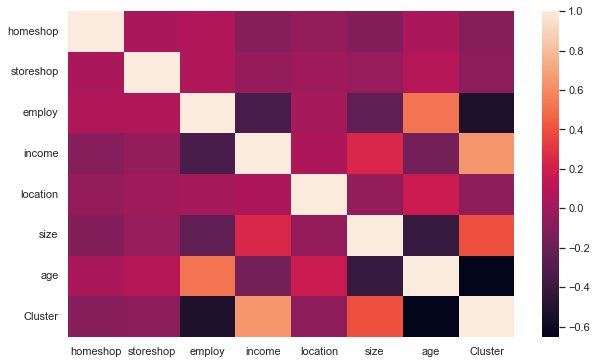

In [32]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.heatmap(data.corr())
plt.show()

### **Outliers** <a class="anchor" id="2.5"></a>

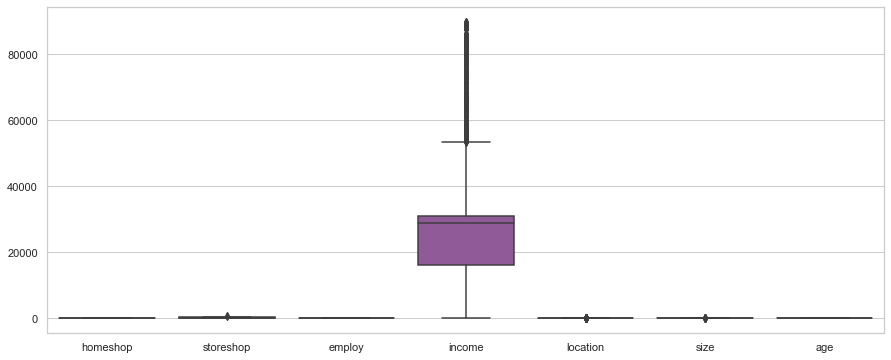

In [9]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=data,
            palette="Set1")
plt.show()

In [10]:
data.head()

,homeshop,storeshop,employ,income,location,size,age
0,20,310,9,28871.518414,2,1,72
1,92,230,9,30550.000000,2,2,60
2,69,240,10,64971.000000,2,4,19
3,88,192,9,37298.000000,4,2,63
4,49,42,1,41135.000000,4,6,47


## **Data Preprocessing** <a class="anchor" id="3"></a>

### **Feature Scalling** <a class="anchor" id="3.1"></a>

In [11]:
sc =StandardScaler()
feature = [i for i in data]
data[feature] = sc.fit_transform(data[feature])

In [12]:
data = pd.DataFrame(data)

In [13]:
data

,homeshop,storeshop,employ,income,location,size,age
0,-1.282203,1.031374,1.180841,0.000000,-0.236382,-1.040900,1.177624
1,-0.100065,0.332426,1.180841,0.088277,-0.236382,-0.255818,0.526043
2,-0.477692,0.419795,1.455057,1.898602,-0.236382,1.314348,-1.700190
3,-0.165739,0.000426,1.180841,0.443179,2.437929,-0.255818,0.688938
4,-0.806064,-1.310102,-1.012880,0.644981,2.437929,2.884513,-0.179836
...,...,...,...,...,...,...,...
2088,0.310400,-0.820838,-1.012880,0.097061,-0.236382,-1.040900,-1.428699
2089,-0.625460,-0.261680,0.632411,-0.582238,-0.236382,1.314348,-0.668521
2090,-0.625460,-1.135365,1.455057,0.035579,-0.236382,1.314348,-1.863086
2091,-0.165739,0.489689,-1.012880,-0.545107,-0.236382,-1.040900,0.254551


## **Model Building** <a class="anchor" id="4"></a>

### **K_mean Clusterung on Whole dataset** <a class="anchor" id="4.1"></a>

#### **Techniques for finding the Optimal Value of k** <a class="anchor" id="4.1.1"></a>

There are two type of Techniques:

    1: Elbow Method 
    2: Silhouette Method

#### **Elbow Method** <a class="anchor" id="4.1.2"></a>

In [14]:
# Elbow Method
k_value = range(1,10)
sse=[]
for k in k_value:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit_predict(data)
    sse.append(k_mean.inertia_)
    


c:\users\zain\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


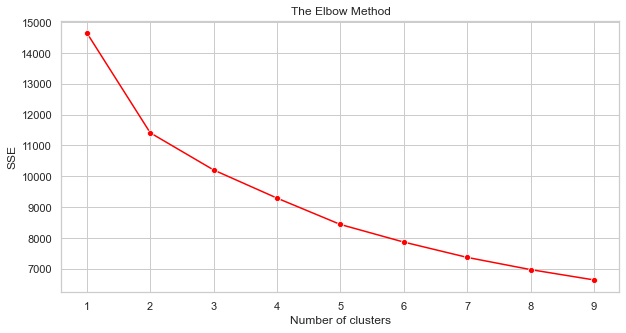

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(k_value, sse,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### **Kmean Algorithm on Dataset** <a class="anchor" id="4.1.3"></a>

In [16]:
k_mean = KMeans(n_clusters=5)
k_mean

KMeans(n_clusters=5)

In [17]:
y_predicted = k_mean.fit_predict(data)
y_predicted

array([4, 4, 2, ..., 0, 1, 0])

In [18]:
data["Cluster"] = y_predicted

In [19]:
data

,homeshop,storeshop,employ,income,location,size,age,Cluster
0,-1.282203,1.031374,1.180841,0.000000,-0.236382,-1.040900,1.177624,4
1,-0.100065,0.332426,1.180841,0.088277,-0.236382,-0.255818,0.526043,4
2,-0.477692,0.419795,1.455057,1.898602,-0.236382,1.314348,-1.700190,2
3,-0.165739,0.000426,1.180841,0.443179,2.437929,-0.255818,0.688938,3
4,-0.806064,-1.310102,-1.012880,0.644981,2.437929,2.884513,-0.179836,3
...,...,...,...,...,...,...,...,...
2088,0.310400,-0.820838,-1.012880,0.097061,-0.236382,-1.040900,-1.428699,1
2089,-0.625460,-0.261680,0.632411,-0.582238,-0.236382,1.314348,-0.668521,0
2090,-0.625460,-1.135365,1.455057,0.035579,-0.236382,1.314348,-1.863086,0
2091,-0.165739,0.489689,-1.012880,-0.545107,-0.236382,-1.040900,0.254551,1


### **K_mean Clusterung on Two Feature** <a class="anchor" id="4.2"></a>

#### **Techniques for finding the Optimal Value of k** <a class="anchor" id="4.2.1"></a>

There are two type of Techniques:

    1: Elbow Method 
    2: Silhouette Method

#### **Elbow Method** <a class="anchor" id="4.2.2"></a>

In [20]:
data1=data[["income","age"]]

In [21]:
# Elbow Method
k_value = range(1,10)
sse=[]
for k in k_value:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit_predict(data1)
    sse.append(k_mean.inertia_)
    


c:\users\zain\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


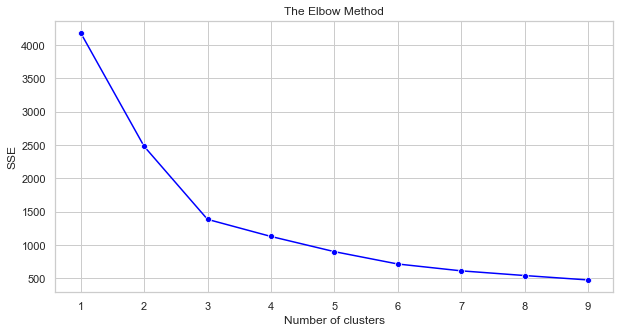

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(k_value, sse,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### **Kmean Algorithm on Columns** <a class="anchor" id="4.2.3"></a>

In [23]:
k_mean = KMeans(n_clusters=3)
k_mean

KMeans(n_clusters=3)

In [24]:
y_predicted = k_mean.fit_predict(data1)
y_predicted

array([0, 0, 2, ..., 1, 0, 2])

In [25]:
data["Cluster"] = y_predicted

#### **Cluster Visualization** <a class="anchor" id="4.2.4"></a>

Text(0.5, 1.0, 'Clustering')

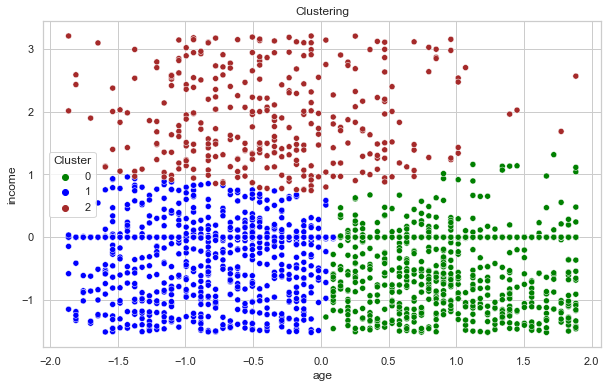

In [33]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.scatterplot(x='age', 
                y='income', 
                hue='Cluster', 
                data=data,
               palette=['green','Blue','brown'])
plt.title("Clustering")